Text(0, 0.5, '%')

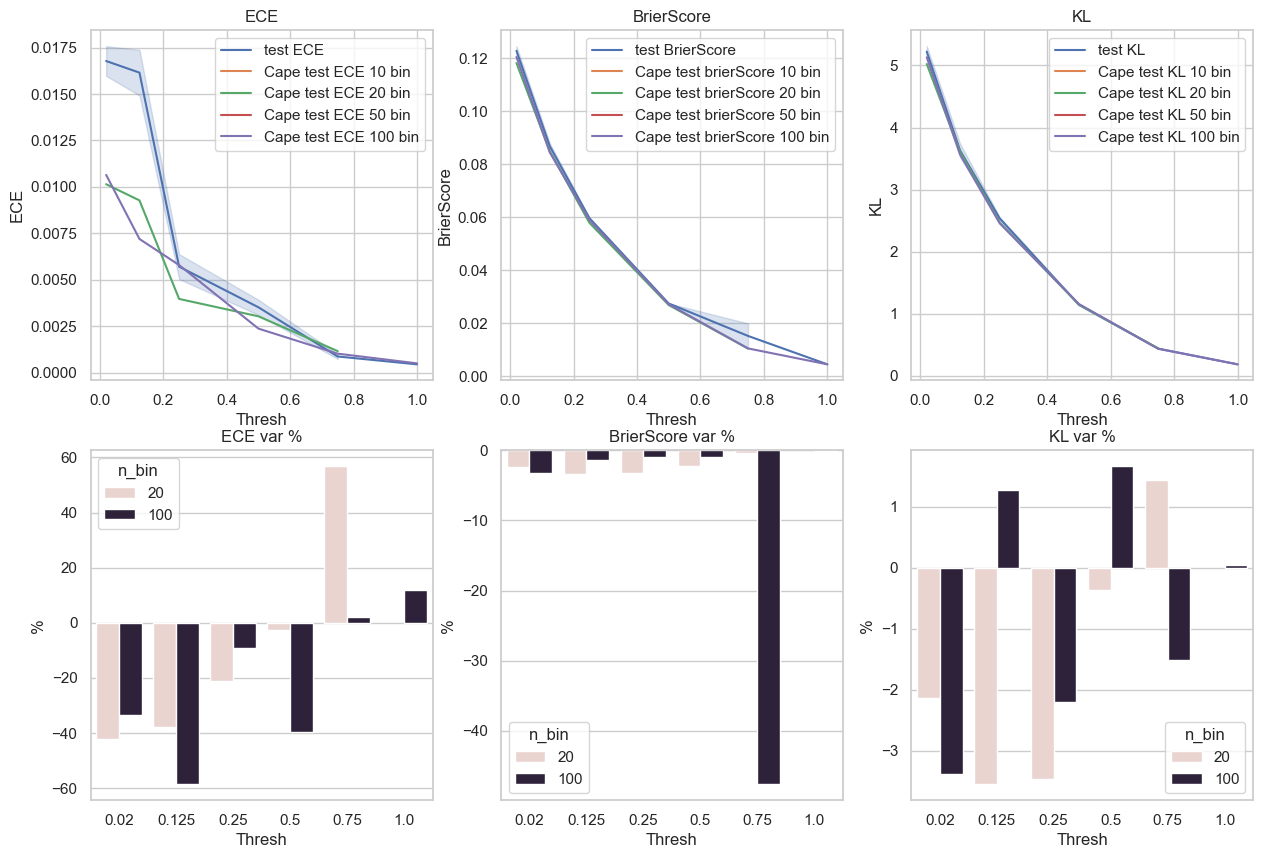

In [322]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("cape.csv")
df = df[df['case_study']=='RYDL']
#df = df[df['case_study']=='SBAD']
#df = pd.read_csv("SBAD.csv")
#print(len(df))
# Estrarre le colonne necessarie
df_plot = df[df['dataset_size'] == 3000]
#df_plot = df_plot[df_plot['thresh']<0.7]
#df_plot = df_plot[df_plot['n_bin']==20]

#group by
df_plot = df_plot.groupby(['n_bin', 'thresh'])[['test/ECE' ,'Cape/test/ECE', 'test/brierScore', 'Cape/test/brierScore', 'test/KL', 'Cape/test/KL']].mean().reset_index()


df_plot['ECE_percent_diff'] = (df_plot['Cape/test/ECE'] - df_plot['test/ECE']) / df_plot['test/ECE'] * 100
df_plot['BR_percent_diff'] = (df_plot['Cape/test/brierScore'] - df_plot['test/brierScore']) / df_plot['test/brierScore'] * 100
df_plot['KL_percent_diff'] = (df_plot['Cape/test/KL'] - df_plot['test/KL']) / df_plot['test/KL'] * 100
df_group = df_plot

# Creare il grafico
fig, axes = plt.subplots(2, 3, figsize=(15, 10))#, sharex=True, sharey=True)
sns.lineplot(ax=axes[0][0], data=df_plot, x='thresh', y='test/ECE', label='test ECE', errorbar='ci')
for bin in [10, 20, 50, 100]:
	sns.lineplot(ax=axes[0][0], data=df_plot[df_plot['n_bin']==bin], x='thresh', y='Cape/test/ECE', label=f'Cape test ECE {bin} bin', errorbar='ci')
axes[0][0].set_title('ECE')
axes[0][0].set_xlabel('Thresh')
axes[0][0].set_ylabel('ECE')

sns.lineplot(ax=axes[0][1], data=df_plot, x='thresh', y='test/brierScore', label='test BrierScore')
for bin in [10, 20, 50, 100]:
	sns.lineplot(ax=axes[0][1], data=df_plot[df_plot['n_bin']==bin], x='thresh', y='Cape/test/brierScore', label=f'Cape test brierScore {bin} bin')
axes[0][1].set_title('BrierScore')
axes[0][1].set_xlabel('Thresh')
axes[0][1].set_ylabel('BrierScore')

sns.lineplot(ax=axes[0][2], data=df_plot, x='thresh', y='test/KL', label='test KL')
for bin in [10, 20, 50, 100]:
	sns.lineplot(ax=axes[0][2], data=df_plot[df_plot['n_bin']==bin], x='thresh', y='Cape/test/KL', label=f'Cape test KL {bin} bin')
axes[0][2].set_title('KL')
axes[0][2].set_xlabel('Thresh')
axes[0][2].set_ylabel('KL')

sns.barplot(ax=axes[1][0], data=df_plot, x='thresh', y='ECE_percent_diff', hue='n_bin')
axes[1][0].set_title('ECE var %')
axes[1][0].set_xlabel('Thresh')
axes[1][0].set_ylabel('%')

sns.barplot(ax=axes[1][1], data=df_plot, x='thresh', y='BR_percent_diff', hue='n_bin')
axes[1][1].set_title('BrierScore var %')
axes[1][1].set_xlabel('Thresh')
axes[1][1].set_ylabel('%')

sns.barplot(ax=axes[1][2], data=df_plot, x='thresh', y='KL_percent_diff', hue='n_bin')
axes[1][2].set_title('KL var %')
axes[1][2].set_xlabel('Thresh')
axes[1][2].set_ylabel('%')

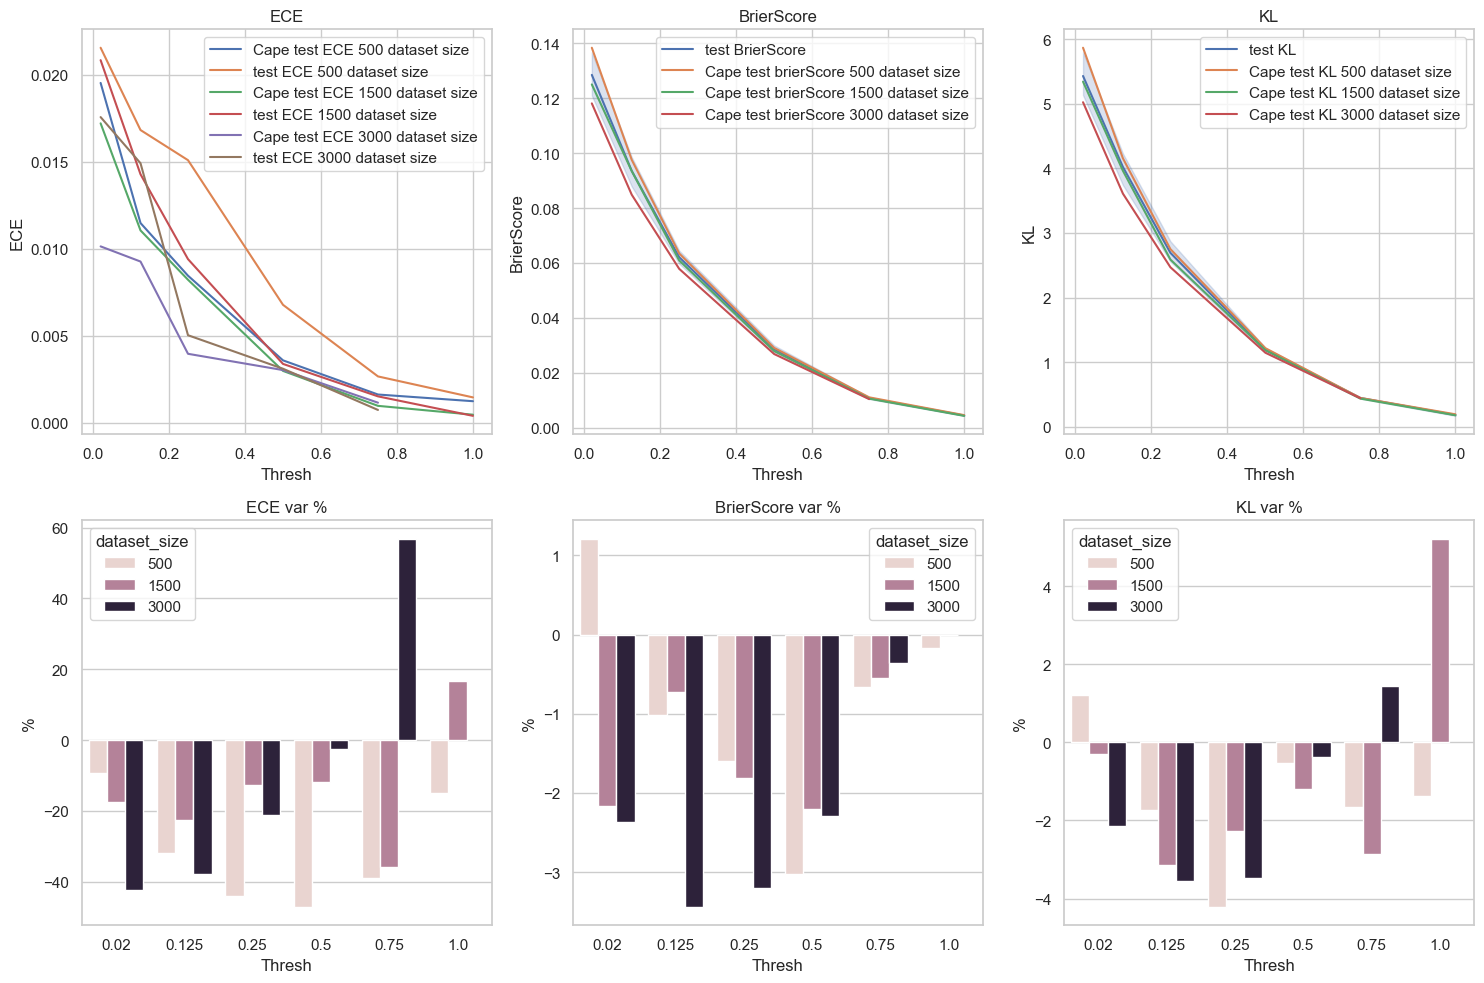

In [323]:
#filtro
df_plot = df[df['n_bin']==20]
#df_plot = df_plot[df_plot['thresh']>0.01]
df_plot = df_plot.groupby(['dataset_size', 'thresh'])[['test/ECE' ,'Cape/test/ECE', 'test/brierScore', 'Cape/test/brierScore', 'test/KL', 'Cape/test/KL']].mean().reset_index()

# Calcolare le variazioni percentuali
df_plot['ECE_percent_diff'] = (df_plot['Cape/test/ECE'] - df_plot['test/ECE']) / df_plot['test/ECE'] * 100
df_plot['BR_percent_diff'] = (df_plot['Cape/test/brierScore'] - df_plot['test/brierScore']) / df_plot['test/brierScore'] * 100
df_plot['KL_percent_diff'] = (df_plot['Cape/test/KL'] - df_plot['test/KL']) / df_plot['test/KL'] * 100

# Creare il grafico
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# ECE
for size in [500, 1500, 3000]:
    sns.lineplot(ax=axes[0][0], data=df_plot[df_plot['dataset_size']==size], x='thresh', y='Cape/test/ECE', label=f'Cape test ECE {size} dataset size')
    sns.lineplot(ax=axes[0][0], data=df_plot[df_plot['dataset_size']==size], x='thresh', y='test/ECE', label=f'test ECE {size} dataset size')
axes[0][0].set_title('ECE')
axes[0][0].set_xlabel('Thresh')
axes[0][0].set_ylabel('ECE')

# BrierScore
sns.lineplot(ax=axes[0][1], data=df_plot, x='thresh', y='test/brierScore', label='test BrierScore')
for size in [500, 1500, 3000]:
    sns.lineplot(ax=axes[0][1], data=df_plot[df_plot['dataset_size']==size], x='thresh', y='Cape/test/brierScore', label=f'Cape test brierScore {size} dataset size')
axes[0][1].set_title('BrierScore')
axes[0][1].set_xlabel('Thresh')
axes[0][1].set_ylabel('BrierScore')

# KL
sns.lineplot(ax=axes[0][2], data=df_plot, x='thresh', y='test/KL', label='test KL')
for size in [500, 1500, 3000]:
    sns.lineplot(ax=axes[0][2], data=df_plot[df_plot['dataset_size']==size], x='thresh', y='Cape/test/KL', label=f'Cape test KL {size} dataset size')
axes[0][2].set_title('KL')
axes[0][2].set_xlabel('Thresh')
axes[0][2].set_ylabel('KL')

# ECE percent difference
sns.barplot(ax=axes[1][0], data=df_plot, x='thresh', y='ECE_percent_diff', hue='dataset_size')
axes[1][0].set_title('ECE var %')
axes[1][0].set_xlabel('Thresh')
axes[1][0].set_ylabel('%')

# BrierScore percent difference
sns.barplot(ax=axes[1][1], data=df_plot, x='thresh', y='BR_percent_diff', hue='dataset_size')
axes[1][1].set_title('BrierScore var %')
axes[1][1].set_xlabel('Thresh')
axes[1][1].set_ylabel('%')

# KL percent difference
sns.barplot(ax=axes[1][2], data=df_plot, x='thresh', y='KL_percent_diff', hue='dataset_size')
axes[1][2].set_title('KL var %')
axes[1][2].set_xlabel('Thresh')
axes[1][2].set_ylabel('%')

# Mostrare i grafici
plt.tight_layout()
plt.show()

308
35


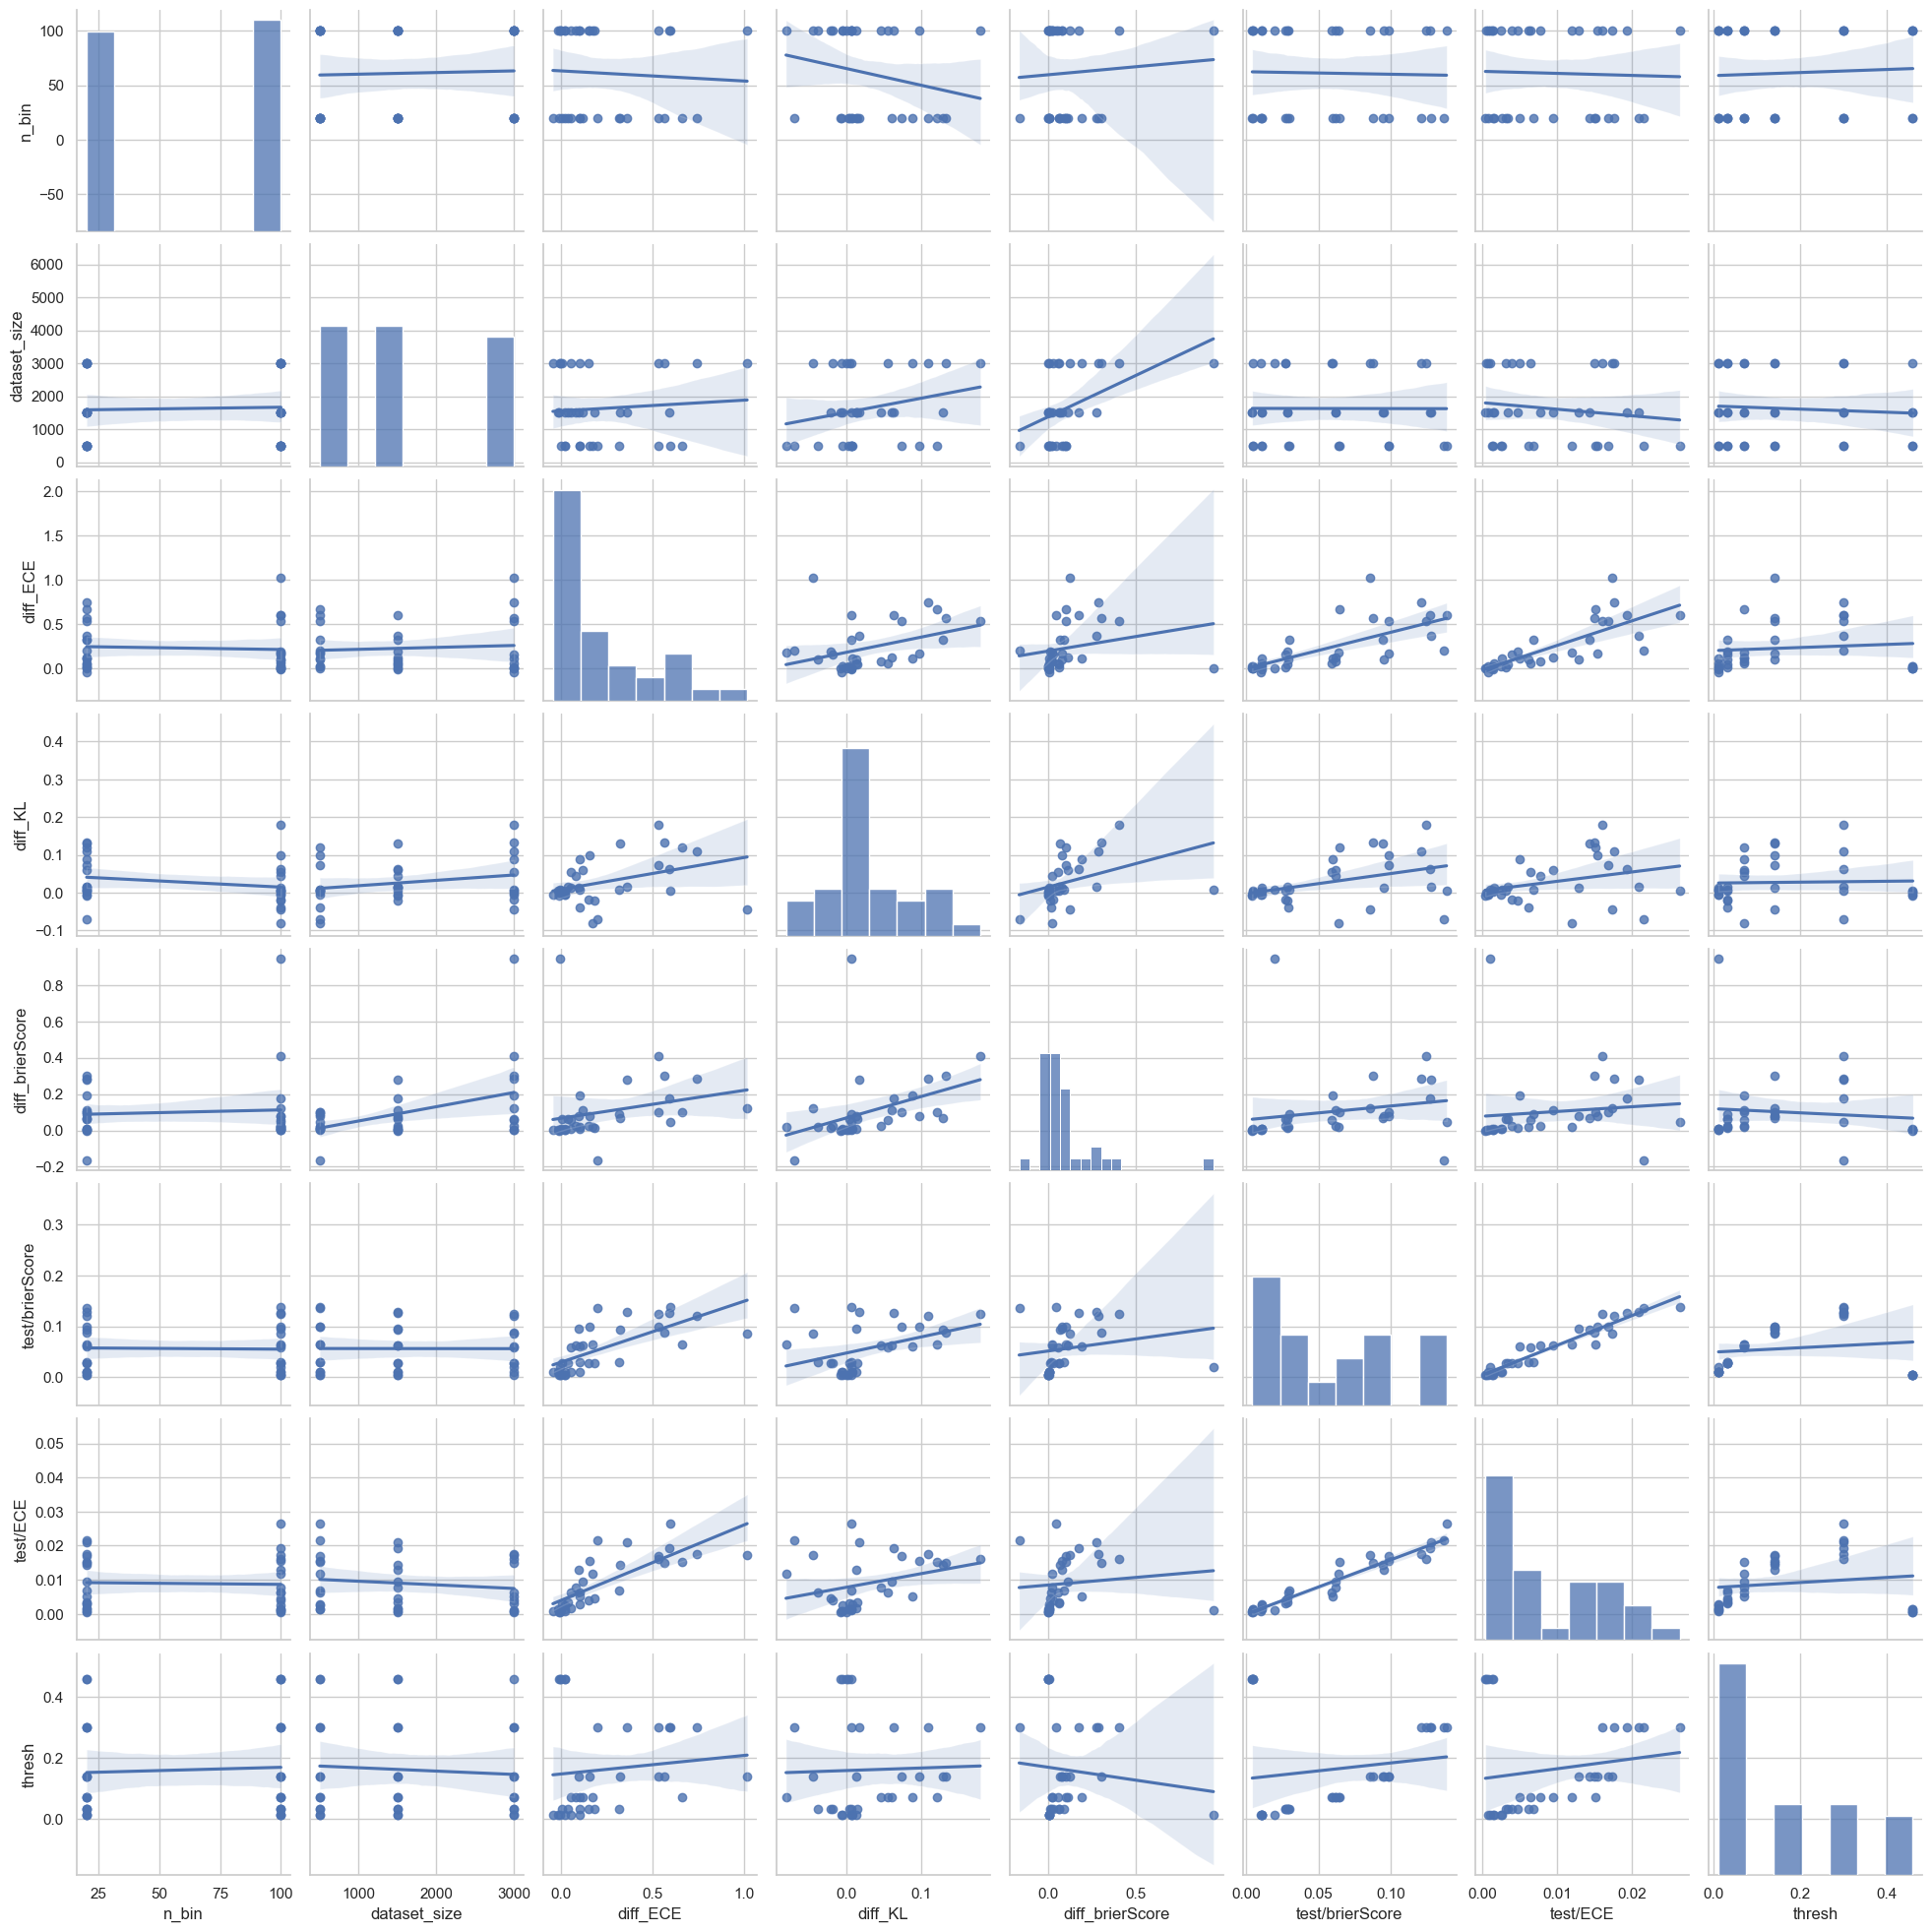

In [324]:
#th to prob
df['thresh'] = df['thresh'].replace(0.02, 0.3)
df['thresh'] = df['thresh'].replace(0.125, 0.14)
df['thresh'] = df['thresh'].replace(0.25, 0.07)
df['thresh'] = df['thresh'].replace(0.5, 0.032)
df['thresh'] = df['thresh'].replace(0.75, 0.011)

df['thresh'] = df['thresh'].replace(1, 0.46)
df['thresh'] = df['thresh'].replace(3, 0.27)
df['thresh'] = df['thresh'].replace(4, 0.14)
#filter
df = df[df['n_bin']!=10]
df = df[df['n_bin']!=50]
df = df[df['thresh']!=1]
print(len(df))

#group by k-fold
df = df.groupby(['n_bin', 'thresh', 'dataset_size'])[['test/ECE' ,'Cape/test/ECE', 'test/brierScore', 'Cape/test/brierScore', 'test/KL', 'Cape/test/KL']].mean().reset_index()
print(len(df))

#calculate diff
df['diff_ECE'] = (df['test/ECE'] - df['Cape/test/ECE'])*100
df['diff_brierScore'] = (df['test/brierScore'] - df['Cape/test/brierScore'])*100
df['diff_KL'] = (df['test/KL'] - df['Cape/test/KL'])


df_plot=df
#df_plot = df_plot[df_plot['n_bin']==20]
df_plot=df_plot[['n_bin','dataset_size', 'diff_ECE', 'diff_KL', 'diff_brierScore', 'test/brierScore', 'test/ECE', 'thresh']]

sns.pairplot(data=df_plot, kind="reg")

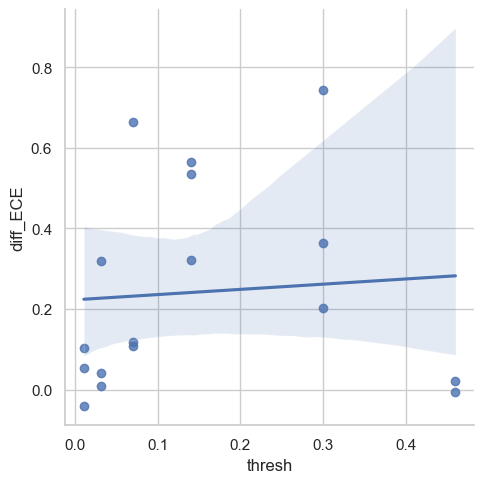

In [325]:
df_plot = df[df['n_bin']==20]

sns.lmplot(data=df_plot, x="thresh", y="diff_ECE")

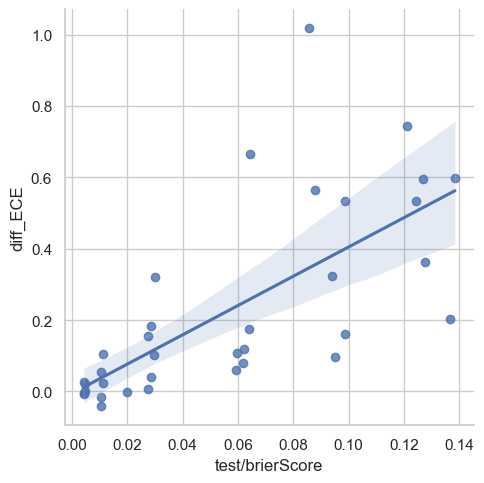

In [326]:
df_plot = df#[df['n_bin']==20]
sns.lmplot(data=df_plot, x="test/brierScore", y="diff_ECE")

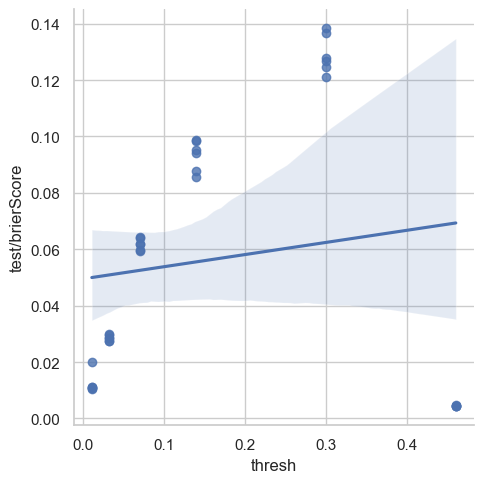

In [327]:
df_plot = df#[df['n_bin']==20]
sns.lmplot(data=df_plot, y="test/brierScore", x="thresh")

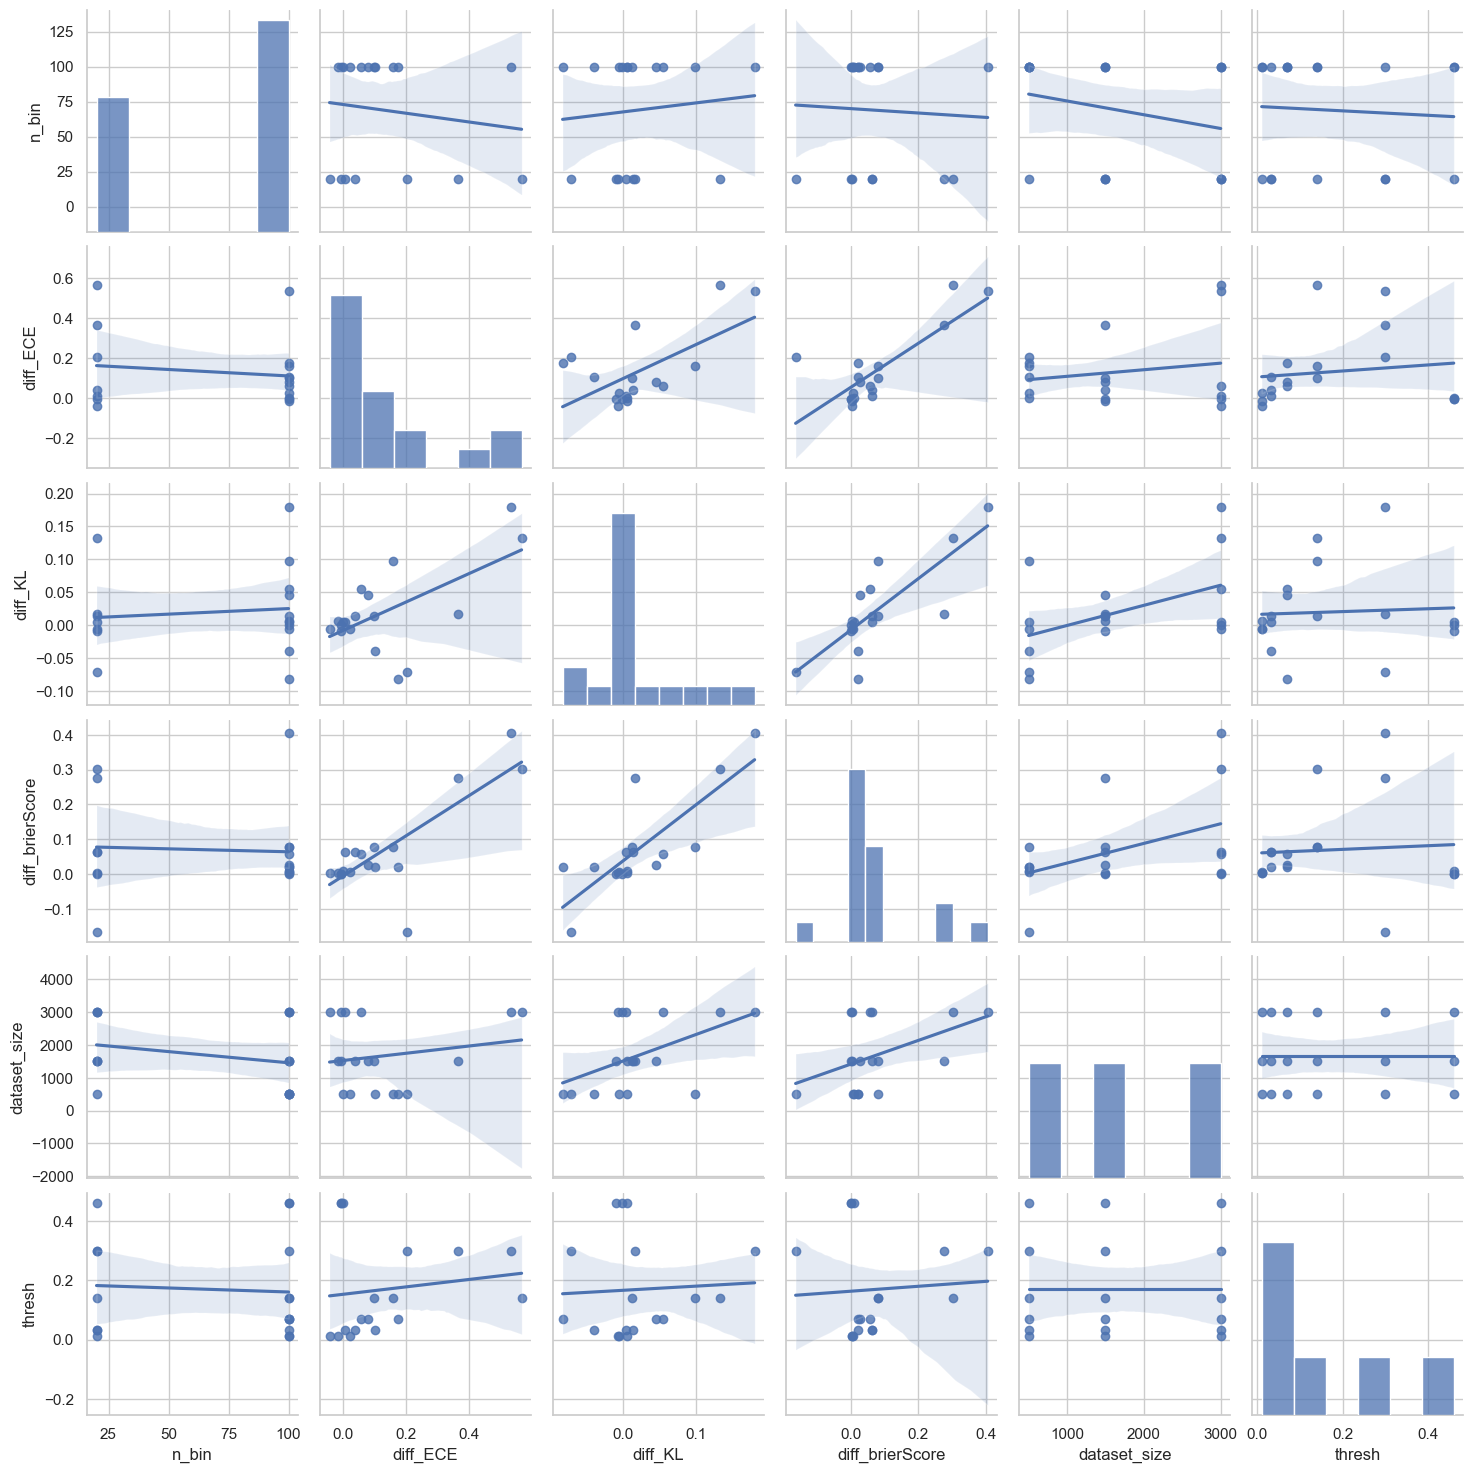

In [328]:
df_plot = df#[df['thresh']>0.1]

#calculate best n_bin
df_plot = df_plot.loc[df_plot.groupby(['dataset_size','thresh'])['diff_ECE'].idxmin()].reset_index()

df_plot=df_plot[['n_bin', 'diff_ECE', 'diff_KL', 'diff_brierScore', 'dataset_size', 'thresh']]

sns.pairplot(data=df_plot, kind='reg')

In [329]:
df_plot

,n_bin,diff_ECE,diff_KL,diff_brierScore,dataset_size,thresh
0,100,0.023236,-0.005185,0.006672,500,0.011
1,100,0.102872,-0.038677,0.019168,500,0.032
2,100,0.174282,-0.081491,0.020466,500,0.070
3,100,0.159758,0.097846,0.078553,500,0.140
4,20,0.202252,-0.070306,-0.165332,500,0.300
5,100,0.000128,0.005648,0.007253,500,0.460
6,100,-0.015392,0.006357,0.003618,1500,0.011
7,20,0.040237,0.014391,0.062821,1500,0.032
8,100,0.080647,0.045564,0.024994,1500,0.070
9,100,0.097304,0.013281,0.078739,1500,0.140


<Axes: xlabel='thresh', ylabel='diff_ECE'>

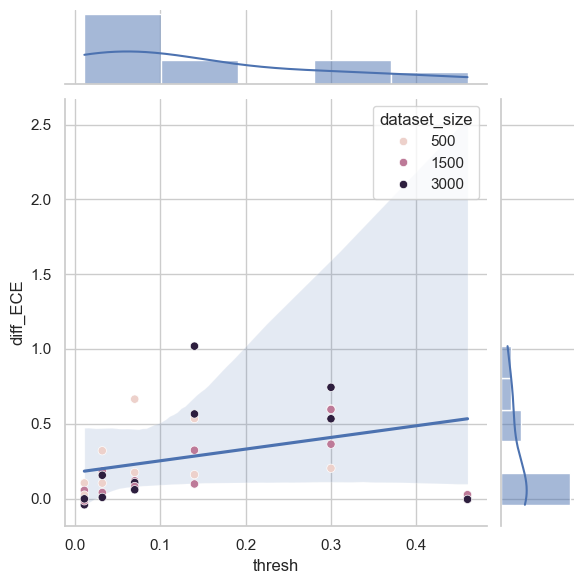

In [330]:
df_plot = df#[df['dataset_size']==3000]
g=sns.jointplot(data=df_plot[df_plot['dataset_size']==3000], x='thresh', y='diff_ECE', kind='reg', scatter=False, color='b')
sns.scatterplot(data=df_plot, x='thresh', y='diff_ECE', hue='dataset_size', ax=g.ax_joint)

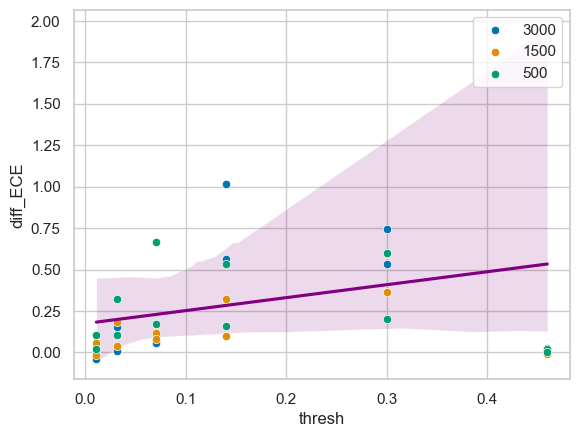

In [331]:
sns.set_palette("colorblind")
sns.regplot(data=df_plot[df_plot['dataset_size']==3000], x="thresh", y="diff_ECE", scatter=False, color='purple')
sns.scatterplot(data=df_plot[df_plot['dataset_size']==3000], x="thresh", y="diff_ECE", label = '3000')
sns.scatterplot(data=df_plot[df_plot['dataset_size']==1500], x="thresh", y="diff_ECE", label = '1500')
sns.scatterplot(data=df_plot[df_plot['dataset_size']==500], x="thresh", y="diff_ECE", label = '500')
plt.title("")
plt.legend()
plt.savefig('thVSECE.png', dpi=300)
plt.show()

<Axes: xlabel='x', ylabel='y'>

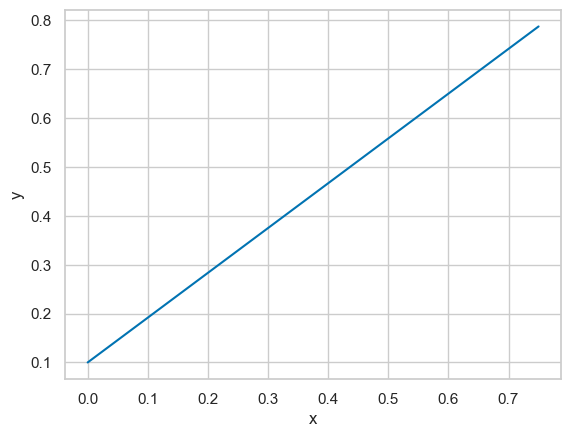

In [332]:
#provvisoria
from sklearn.calibration import calibration_curve
import numpy as np
y_true_gt = np.zeros(100)
probs = np.zeros(100)
probs[99] = 0.9
probs[98] = 0.85
probs[97] = 0.7
probs[96] = 0.3
probs = probs +0.1
y_true_gt[99] = 1
y_true_gt[98] = 1
y_true_gt[97] = 1
x_, y_ = calibration_curve(y_true_gt, probs, n_bins=20, strategy="quantile")
pf = pd.DataFrame({'x' : x_, 'y':y_})
sns.lineplot(data=pf, x='x', y='y')

KeyError: 'method'

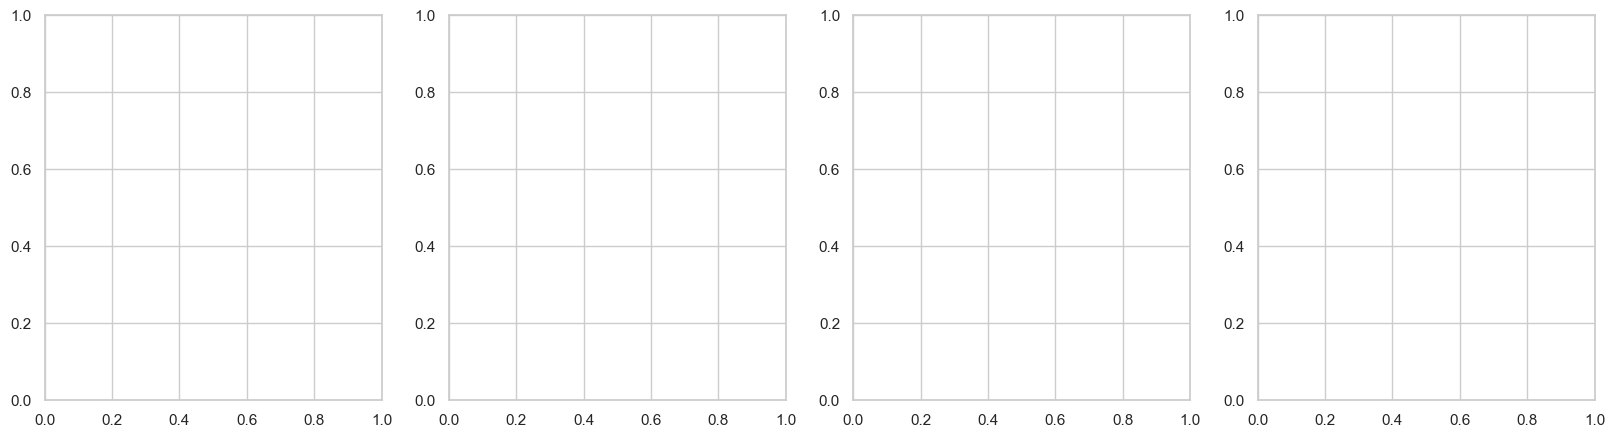

In [333]:
# Supponiamo di avere un DataFrame chiamato df
# df = pd.read_csv('your_data.csv')

# Calcolare la media mobile di 5 epoch
df['training_loss_moving_avg'] = df.groupby('method')['training_loss'].transform(lambda x: x.rolling(5, min_periods=1).mean())
df['validation_loss_moving_avg'] = df.groupby('method')['validation_loss'].transform(lambda x: x.rolling(5, min_periods=1).mean())
df['MSE_p_moving_avg'] = df.groupby('method')['MSE_p'].transform(lambda x: x.rolling(5, min_periods=1).mean())
df['KL_p_moving_avg'] = df.groupby('method')['KL_p'].transform(lambda x: x.rolling(5, min_periods=1).mean())

# Configurare lo stile di Seaborn
sns.set_theme(style="whitegrid")

# Creare una figura con più subplot
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Grafico 1: Training loss
sns.lineplot(ax=axes[0], data=df[df['method'] == 'Cross-Entropy minimization'], x='epoch', y='training_loss', color='blue', alpha=0.2, label='Actual')
sns.lineplot(ax=axes[0], data=df[df['method'] == 'CaPE'], x='epoch', y='training_loss', color='red', alpha=0.2, label='Actual')
sns.lineplot(ax=axes[0], data=df[df['method'] == 'Cross-Entropy minimization'], x='epoch', y='training_loss_moving_avg', color='blue', label='Moving Avg')
sns.lineplot(ax=axes[0], data=df[df['method'] == 'CaPE'], x='epoch', y='training_loss_moving_avg', color='red', label='Moving Avg')
axes[0].set_title('Training loss')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('loss')

# Grafico 2: Validation loss
sns.lineplot(ax=axes[1], data=df[df['method'] == 'Cross-Entropy minimization'], x='epoch', y='validation_loss', color='blue', alpha=0.2, label='Actual')
sns.lineplot(ax=axes[1], data=df[df['method'] == 'CaPE'], x='epoch', y='validation_loss', color='red', alpha=0.2, label='Actual')
sns.lineplot(ax=axes[1], data=df[df['method'] == 'Cross-Entropy minimization'], x='epoch', y='validation_loss_moving_avg', color='blue', label='Moving Avg')
sns.lineplot(ax=axes[1], data=df[df['method'] == 'CaPE'], x='epoch', y='validation_loss_moving_avg', color='red', label='Moving Avg')
axes[1].set_title('Validation loss')
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('loss')

# Grafico 3: MSE_p
sns.lineplot(ax=axes[2], data=df[df['method'] == 'Cross-Entropy minimization'], x='epoch', y='MSE_p', color='blue', alpha=0.2, label='Actual')
sns.lineplot(ax=axes[2], data=df[df['method'] == 'CaPE'], x='epoch', y='MSE_p', color='red', alpha=0.2, label='Actual')
sns.lineplot(ax=axes[2], data=df[df['method'] == 'Cross-Entropy minimization'], x='epoch', y='MSE_p_moving_avg', color='blue', label='Moving Avg')
sns.lineplot(ax=axes[2], data=df[df['method'] == 'CaPE'], x='epoch', y='MSE_p_moving_avg', color='red', label='Moving Avg')
axes[2].set_title('MSE_p')
axes[2].set_xlabel('epoch')
axes[2].set_ylabel('MSE')

# Grafico 4: KL_p
sns.lineplot(ax=axes[3], data=df[df['method'] == 'Cross-Entropy minimization'], x='epoch', y='KL_p', color='blue', alpha=0.2, label='Actual')
sns.lineplot(ax=axes[3], data=df[df['method'] == 'CaPE'], x='epoch', y='KL_p', color='red', alpha=0.2, label='Actual')
sns.lineplot(ax=axes[3], data=df[df['method'] == 'Cross-Entropy minimization'], x='epoch', y='KL_p_moving_avg', color='blue', label='Moving Avg')
sns.lineplot(ax=axes[3], data=df[df['method'] == 'CaPE'], x='epoch', y='KL_p_moving_avg', color='red', label='Moving Avg')
axes[3].set_title('KL_p')
axes[3].set_xlabel('epoch')
axes[3].set_ylabel('KL divergence')

# Aggiungere annotazioni per "CaPE begins"
for ax in axes:
    ax.annotate('CaPE begins', xy=(20, ax.get_ylim()[1]), xytext=(20, ax.get_ylim()[1] * 0.9),
                arrowprops=dict(facecolor='black', shrink=0.05))

# Aggiungere una legenda generale
fig.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.1), bbox_transform=plt.gcf().transFigure, labels=['Actual', 'Moving Avg', 'CaPE begins'])

# Mostrare il grafico
plt.tight_layout()
plt.show()
